In [29]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [30]:
data = pd.read_csv('spam_or_not_spam.csv')

X = data['email']
y = data['label']

print(X, 'x')
print(y, 'y')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.dropna()
X_test = X_test.dropna()

# Replace NaN values with empty strings in the email data
X_train = X_train.fillna('')
X_test = X_test.fillna('')



0        date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...
1       martin a posted tassos papadopoulos the greek ...
2       man threatens explosion in moscow thursday aug...
3       klez the virus that won t die already the most...
4        in adding cream to spaghetti carbonara which ...
                              ...                        
2995     abc s good morning america ranks it the NUMBE...
2996     hyperlink hyperlink hyperlink let mortgage le...
2997     thank you for shopping with us gifts for all ...
2998     the famous ebay marketing e course learn to s...
2999     hello this is chinese traditional 子 件 NUMBER世...
Name: email, Length: 3000, dtype: object x
0       0
1       0
2       0
3       0
4       0
       ..
2995    1
2996    1
2997    1
2998    1
2999    1
Name: label, Length: 3000, dtype: int64 y


In [28]:
# Text preprocessing
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()]  # Remove non-alphabetic characters
    tokens = [word.lower() for word in tokens if word.lower() not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

X_train = X_train.apply(preprocess_text)
X_test = X_test.apply(preprocess_text)

# Feature extraction using TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(X_train_tfidf, 'X_train_tfidf')
print(X_test_tfidf, 'X_test_tfidf')
print(stop_words, 'stop_words')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


  (0, 4341)	0.39291150567858635
  (0, 4959)	0.23901728013648013
  (0, 2899)	0.654096951562447
  (0, 711)	0.6005401455841728
  (1, 4454)	0.16579757984622573
  (1, 1908)	0.09301477304299845
  (1, 3213)	0.13164354834184297
  (1, 2472)	0.1385585274136296
  (1, 359)	0.16335920959705952
  (1, 2433)	0.10445096917135492
  (1, 2341)	0.34984516349495753
  (1, 2649)	0.10987068507702594
  (1, 4076)	0.11911917968993234
  (1, 4900)	0.14681620816223906
  (1, 2492)	0.13232581607458732
  (1, 2348)	0.11045215382838987
  (1, 160)	0.13945628702763355
  (1, 2042)	0.16849307310145092
  (1, 1343)	0.14235563414036637
  (1, 1487)	0.09703296963778749
  (1, 4387)	0.09978654129197458
  (1, 4942)	0.07705201919478565
  (1, 1956)	0.22031953503458335
  (1, 2639)	0.07369566016677022
  (1, 1376)	0.1303312851263805
  :	:
  (2398, 422)	0.042446025709282846
  (2398, 845)	0.04958997376207195
  (2398, 4728)	0.08192642415901168
  (2398, 3011)	0.07224660894982128
  (2398, 1137)	0.06908271987583182
  (2398, 2628)	0.04506007346

In [9]:
# Check the number of samples in X_train_tfidf and y_train
print(X_train_tfidf.shape[0])
print(len(y_train))

# If there is a mismatch (X_train_tfidf.shape[0] < len(y_train)), remove extra sample from y_train
y_train = y_train.iloc[:X_train_tfidf.shape[0]]

# Assign a MultinomialNB classifier
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)


2399
2400


MultinomialNB()

In [10]:
# Predict based on classifier
y_pred = classifier.predict(X_test_tfidf)

# Set accuracy score & classification report
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)


Accuracy: 0.885
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       505
           1       0.96      0.28      0.44        95

    accuracy                           0.89       600
   macro avg       0.92      0.64      0.69       600
weighted avg       0.89      0.89      0.86       600



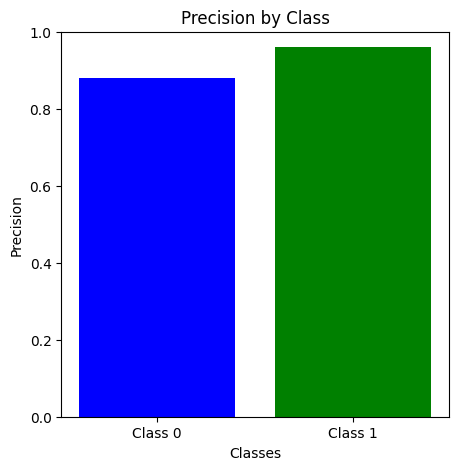

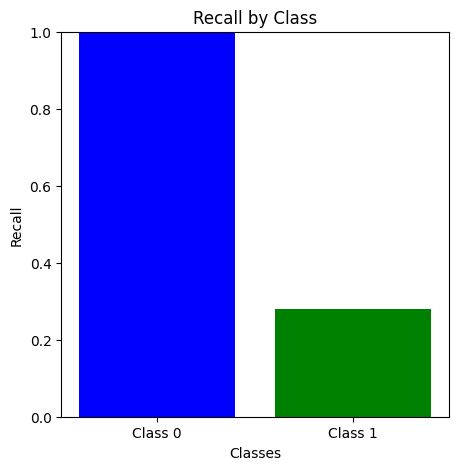

In [11]:
# Classification report data
class_names = ['Class 0', 'Class 1']
precision = [0.88, 0.96]
recall = [1.00, 0.28]
f1_score = [0.94, 0.44]

# Create a bar chart for precision
plt.figure(figsize=(5, 5))
plt.bar(class_names, precision, color=['blue', 'green'])
plt.xlabel('Classes')
plt.ylabel('Precision')
plt.title('Precision by Class')
plt.ylim(0, 1)  # Set the range between 0 and 1
plt.show()

# Create a bar chart for recall
plt.figure(figsize=(5, 5))
plt.bar(class_names, recall, color=['blue', 'green'])
plt.xlabel('Classes')
plt.ylabel('Recall')
plt.title('Recall by Class')
plt.ylim(0, 1)  # Set the range between 0 and 1
plt.show()

0        date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...
1       martin a posted tassos papadopoulos the greek ...
2       man threatens explosion in moscow thursday aug...
3       klez the virus that won t die already the most...
4        in adding cream to spaghetti carbonara which ...
                              ...                        
2995     abc s good morning america ranks it the NUMBE...
2996     hyperlink hyperlink hyperlink let mortgage le...
2997     thank you for shopping with us gifts for all ...
2998     the famous ebay marketing e course learn to s...
2999     hello this is chinese traditional 子 件 NUMBER世...
Name: email, Length: 3000, dtype: object


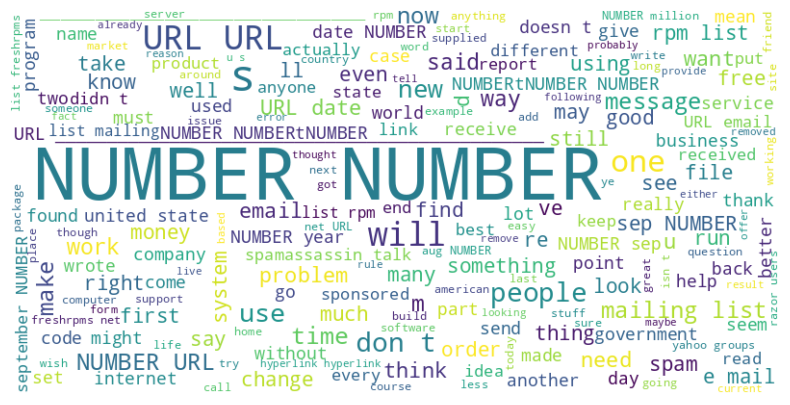

In [26]:
print(X)

# Convert non-string values to strings and combine all email text into a single string
text = " ".join(str(email) for email in X)

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
